##### To load the needed liberies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import xgboost as xg
from sklearn import metrics
from sklearn.preprocessing  import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
import time

In [5]:
%matplotlib inline

##### To load the train and test dataset downloaded from Kaggle

In [6]:
train_df = pd.read_csv("train.csv")  
test_df = pd.read_csv("test.csv")

In [5]:
train_df.columns ## Features in the train dataset

Index(['traveller_ID', 'ticket_class', 'name', 'sex', 'age',
       'Siblings_spouses', 'Parchil', 'TickNum', 'fare', 'cabin', 'embarked',
       'MedBoat', 'Survived'],
      dtype='object')

In [5]:
train_df.head(10)

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,1
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,NaN,0
5,895,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,15,1
6,813,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S,NaN,0
7,745,3,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0,0,0,382650,6.9500,NaN,Q,15,1
8,1030,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0
9,1072,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,NaN,0


##### To check the number of columns and rows in our data: for training dataset, there are 916 rows and 13 columns (features); for testing data, there are 393 rows and 12 (features) excluding the label

In [7]:
df = [train_df, test_df]
for i in range(len(df)):
    print(df[i].shape)

(916, 13)
(393, 12)


In [77]:
train_df.isnull().mean().sort_values(ascending=False)*100 ## To check the percentage of the null value in the features

cabin               77.729258
MedBoat             64.301310
age                 20.414847
embarked             0.109170
fare                 0.109170
Survived             0.000000
TickNum              0.000000
Parchil              0.000000
Siblings_spouses     0.000000
sex                  0.000000
name                 0.000000
ticket_class         0.000000
traveller_ID         0.000000
dtype: float64

In [205]:
train_df.dtypes ## From below, there are 7 numerical features, 6 categorical features

traveller_ID          int64
ticket_class          int64
name                 object
sex                  object
age                 float64
Siblings_spouses      int64
Parchil               int64
TickNum              object
fare                float64
cabin                object
embarked             object
MedBoat              object
Survived              int64
dtype: object

In [206]:
train_df.describe(include="all")

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
count,916.000000,916.000000,916,916,729.000000,916.000000,916.000000,916,915.000000,204,915,327,916.000000
unique,NaN,NaN,915,2,NaN,NaN,NaN,694,NaN,146,3,24,NaN
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,B57 B59 B63 B66,S,13,NaN
freq,NaN,NaN,2,592,NaN,NaN,NaN,9,NaN,5,638,30,NaN
mean,656.248908,2.305677,NaN,NaN,29.102309,0.539301,0.386463,NaN,33.709221,NaN,NaN,NaN,0.361354
std,381.176191,0.841811,NaN,NaN,13.866954,1.082188,0.893933,NaN,52.840656,NaN,NaN,NaN,0.480655
min,0.000000,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,328.250000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.925000,NaN,NaN,NaN,0.000000
50%,670.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.500000,NaN,NaN,NaN,0.000000
75%,974.250000,3.000000,NaN,NaN,37.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,1.000000


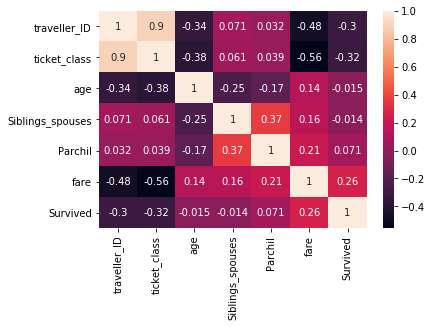

In [157]:
sns.heatmap(train_df.corr(), annot=True)

###### From above, there is an observation of outliers in "fare", "parchil", "age", "Siblings_spouses" features as there is huge gap between the 75% and max

##### To visualize and fill the null values in our dataset for "emabarked", "fare", "age"

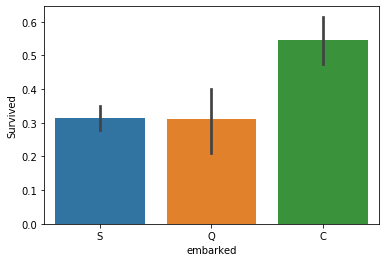

In [207]:
sns.barplot(train_df.embarked, train_df.Survived)

In [8]:
## Filling embarked feature na with its mode value

df = [train_df, test_df]
for i in range(len(df)):
    df[i]['embarked'].fillna(df[i]['embarked'].mode()[0], inplace = True)

In [9]:
## To change the embarked categorical feature to numerical feature using LabelEncoder

for i in range(len(df)):
    labelencoder = LabelEncoder()
    df[i]["embarked"] = labelencoder.fit_transform(df[i]["embarked"])

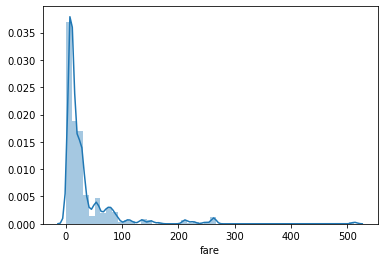

In [235]:
sns.distplot(train_df.fare)

In [10]:
## Filling flare feature na

for i in range(len(df)):
    df[i]['fare'].fillna(0, inplace = True)

df[0].fare = df[0].fare.astype(int)
df[1].fare = df[1].fare.astype(int)

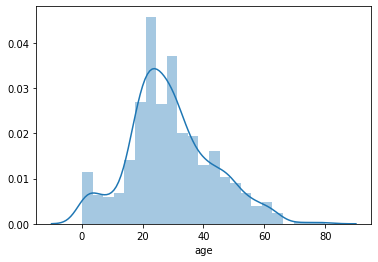

In [212]:
sns.distplot(train_df.age)

In [11]:
for i in range(len(df)):
    df[i]['age'].fillna(df[i]['age'].median(), inplace = True)

df[0].age = df[0].age.astype(int)
df[1].age = df[1].age.astype(int)

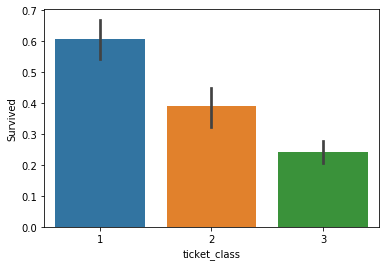

In [79]:
sns.barplot(train_df.ticket_class, train_df.Survived)

##### Dropping the "cabin" and "MedBoat" features as they high percentage of null values

In [12]:
drop_column = ['cabin', 'MedBoat']
for i in range(len(df)):
    df[i].drop(drop_column, axis=1, inplace=True)

##### To perform feature engineering on the features

In [13]:
for i in range(len(df)):
    df[i]['FamilySize'] = df[i]['Siblings_spouses'] + df[i]['Parchil'] + 1

In [14]:
##
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [15]:
for i in range(len(df)):
    df[i]['Title'] = df[i]['name'].apply(get_title)

# Group all non-common titles into one single grouping "Rare"
for i in range(len(df)):
    df[i]['Title'] = df[i]['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                             'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df[i]['Title'] = df[i]['Title'].replace('Mlle', 'Miss')
    df[i]['Title'] = df[i]['Title'].replace('Ms', 'Miss')
    df[i]['Title'] = df[i]['Title'].replace('Mme', 'Mrs')

In [16]:
for i in range(len(df)):
    df[i]['Age_bin'] = pd.cut(df[i]['age'], bins=[0, 12, 20, 40, 120], labels=['Children','Teenage','Adult','Elder'])

In [17]:
for i in range(len(df)):
    dummy =  pd.get_dummies(df[i][["sex", "Title", "Age_bin"]])
    df[i] = pd.concat([df[i], dummy], axis=1)

train_df = df[0]
test_df = df[1]

In [18]:
for i in range(len(df)):
    drop_column = ["age", "name", "TickNum", "traveller_ID", "sex", "Title", "Age_bin"]
    df[i].drop(drop_column, axis=1, inplace=True)

In [19]:
train_df

,ticket_class,Siblings_spouses,Parchil,fare,embarked,Survived,FamilySize,sex_female,sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_bin_Children,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder
0,3,0,0,8,2,0,1,0,1,0,0,1,0,0,0,0,1,0
1,3,0,0,7,2,0,1,0,1,0,0,1,0,0,0,0,1,0
2,2,0,0,26,2,1,1,1,0,0,1,0,0,0,0,1,0,0
3,3,8,2,69,2,0,11,1,0,0,1,0,0,0,0,0,1,0
4,3,0,0,7,2,0,1,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,3,0,0,7,1,0,1,1,0,0,1,0,0,0,0,0,1,0
912,3,0,0,7,2,0,1,1,0,0,1,0,0,0,0,1,0,0
913,3,0,0,16,2,0,1,0,1,0,0,1,0,0,0,0,1,0
914,3,0,0,7,2,1,1,1,0,0,1,0,0,0,0,0,1,0


##### To train my model

In [20]:
features = train_df.drop("Survived", axis=1)
label = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((641, 17), (275, 17), (641,), (275,))

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
prediction = model.predict(X_test)

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 80.36


Text(0.5, 1.05, 'Confusion_matrix')

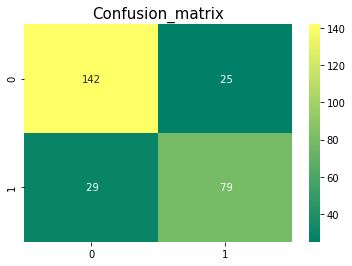

In [24]:
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(metrics.accuracy_score(prediction, y_test)*100, 2))

#kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
#result = cross_val_score(model, features, label, cv=10, scoring='accuracy')
#print('The cross validated score for Logistic REgression is:',round(result.mean()*100, 2))

#y_pred = cross_val_predict(model, features, label, cv=10)

sns.heatmap(metrics.confusion_matrix(y_test, prediction), annot=True, fmt='3.0f', cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [25]:
model = LinearDiscriminantAnalysis()

model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

--------------The Accuracy of the model----------------------------


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


The cross validated score for AdaBoostClassifier is: 80.56


Text(0.5, 1.05, 'Confusion_matrix')

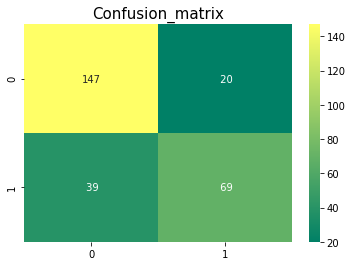

In [32]:
prediction_ld = model.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
#print('The accuracy of the LinearDiscriminantAnalysis is',round(metrics.accuracy_score(prediction_ld, y_test)*100,2))

kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts

result_lda=cross_val_score(model, features, label, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_lda.mean()*100,2))

y_pred = cross_val_predict(model, features, label, cv=10)

sns.heatmap(metrics.confusion_matrix(y_test, prediction_ld), annot=True, fmt='3.0f', cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [47]:
"""""  
print("Important features")
pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
#print(acc_random_forest) 
"""""

'""  \nprint("Important features")\npd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)\nprint(\'__\'*30)\n#print(acc_random_forest) \n'

In [22]:
## For the submission on kaggle

predicted = model.predict(test_df)
result = pd.read_csv("sample_submission.csv")
result["Survived"] = predicted
result.to_csv("LastLogistics.csv", index= False)

In [1]:
"""""

from sklearn.model_selection import GridSearchCV

model = SVC()
param_grid = {'kernel': ['rbf','linear'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

modelsvm = GridSearchCV(model, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

modelsvm.fit(X_train, y_train)

print(modelsvm.best_estimator_)

# Best score
print(modelsvm.best_score_)
print(modelsvm.best_param_)

"""""

'""\n\nfrom sklearn.model_selection import GridSearchCV\n\nmodel = SVC()\nparam_grid = {\'kernel\': [\'rbf\',\'linear\'], \n                  \'gamma\': [ 0.001, 0.01, 0.1, 1],\n                  \'C\': [1, 10, 50, 100,200,300, 1000]}\n\nmodelsvm = GridSearchCV(model, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)\n\nmodelsvm.fit(X_train, y_train)\n\nprint(modelsvm.best_estimator_)\n\n# Best score\nprint(modelsvm.best_score_)\nprint(modelsvm.best_param_)\n\n'